In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime as dat

In [52]:
# 1. Fetch historical data
crypto = 'BTC-USD' 
end = dat.datetime.now()
start = end - dat.timedelta(days=365)  # Fetch data for the last year
data = yf.download(tickers = crypto, start=start, end=end, interval='1d')

C:\Users\mpjau\AppData\Local\Temp\ipykernel_6976\1663454757.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers = crypto, start=start, end=end, interval='1d')
[*********************100%***********************]  1 of 1 completed


In [53]:
# Inspect the data
data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-06-14,66011.093750,67294.648438,65056.894531,66747.570312,27403884779
2024-06-15,66191.000000,66402.187500,65871.773438,66006.742188,14121265576
2024-06-16,66639.046875,66894.843750,66018.250000,66189.359375,13281140541
2024-06-17,66490.296875,67188.320312,65094.964844,66636.515625,30006354476
2024-06-18,65140.746094,66556.703125,64066.957031,66490.976562,39481285950


In [54]:
# 2. Calculate log returns
data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1)) # assuming log returns are normally distributed

In [55]:
# 3. Estimate the parameters
mu = data['Log Returns'].mean()  # Mean of returns
sigma = data['Log Returns'].std()  # Standard deviation of returns

In [56]:
# 4. Monte Carlo Simulation initical conditions
S0 = data['Log Returns'].iloc[-1]  # Starting price (current price)
T = 365  # Number of days to simulate
simulations = 1000  # Number of simulations
dt = 1  # Time step (1 day)
np.random.seed(42)  # For reproducibility

In [57]:
# 5. Run Monte Carlo Simulation
simulated_prices = np.zeros((T, simulations))
simulated_prices[0] = S0

In [58]:
for t in range(1, T):
    Z = np.random.standard_normal(simulations)  # Random numbers from standard normal
    simulated_prices[t] = simulated_prices[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z) # Discrete Geometric Brownian Motion formula

In [59]:
simulated_pricesdf = pd.DataFrame(simulated_prices)

In [60]:
simulated_pricesdf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167,...,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167,-0.009167
1,-0.009295,-0.009143,-0.009331,-0.009546,-0.009120,-0.009120,-0.009560,-0.009361,-0.009065,-0.009306,...,-0.009226,-0.008702,-0.009117,-0.009015,-0.008940,-0.009109,-0.009614,-0.009330,-0.009041,-0.009313
2,-0.009648,-0.009374,-0.009355,-0.009396,-0.009296,-0.009222,-0.009794,-0.009525,-0.009324,-0.009186,...,-0.009428,-0.008882,-0.009412,-0.009191,-0.009031,-0.009375,-0.009617,-0.009127,-0.009011,-0.009143
3,-0.009489,-0.009348,-0.009173,-0.009330,-0.008858,-0.009282,-0.009804,-0.009334,-0.009494,-0.009421,...,-0.009816,-0.009031,-0.009438,-0.009149,-0.008818,-0.009402,-0.009690,-0.008846,-0.009098,-0.009115
4,-0.009039,-0.009150,-0.009083,-0.009808,-0.008995,-0.008974,-0.009937,-0.008975,-0.009774,-0.009316,...,-0.009404,-0.008929,-0.008975,-0.009338,-0.008366,-0.009418,-0.009190,-0.008781,-0.009504,-0.009210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.037110,-0.021920,-0.009607,-0.018299,-0.016807,-0.007360,-0.023148,-0.014687,-0.011895,-0.021433,...,-0.015946,-0.009800,-0.020090,-0.023744,-0.031738,-0.011972,-0.015750,-0.009079,-0.015962,-0.008341
361,-0.037220,-0.021881,-0.009569,-0.017664,-0.016650,-0.007479,-0.022837,-0.014758,-0.012469,-0.022793,...,-0.016003,-0.010175,-0.021525,-0.024123,-0.032917,-0.011757,-0.016173,-0.008806,-0.015766,-0.008113
362,-0.036937,-0.021427,-0.009383,-0.017219,-0.017541,-0.007512,-0.022819,-0.014714,-0.012579,-0.022281,...,-0.016393,-0.010708,-0.021794,-0.023553,-0.033035,-0.011877,-0.016206,-0.009223,-0.016822,-0.008088
363,-0.037457,-0.021518,-0.009595,-0.017307,-0.017521,-0.007733,-0.022012,-0.014725,-0.012980,-0.022757,...,-0.017281,-0.011200,-0.021830,-0.023550,-0.033732,-0.011724,-0.016246,-0.009075,-0.017618,-0.008081


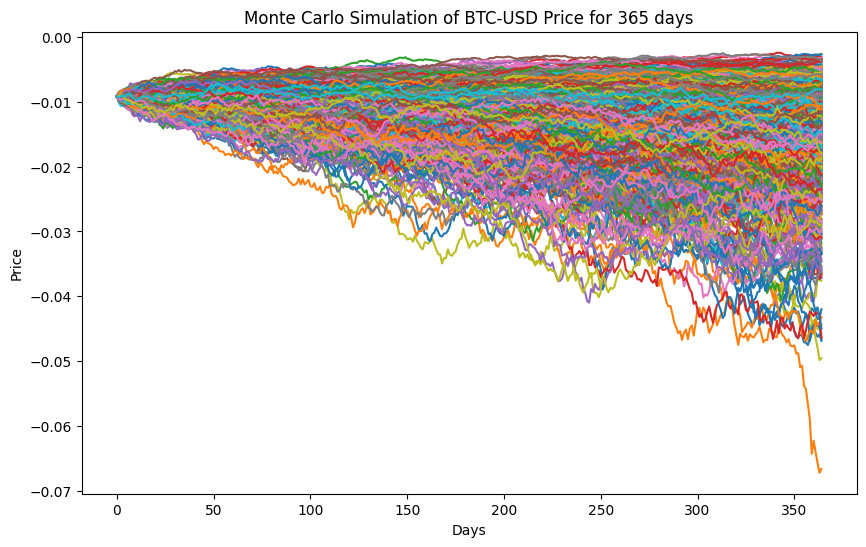

In [61]:
# 6. Plot the simulation results
plt.figure(figsize=(10,6))
plt.plot(simulated_prices)
plt.title(f"Monte Carlo Simulation of {crypto} Price for {T} days")
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [49]:
# 7. Analyze the results (e.g., mean, quantiles)
final_prices = simulated_prices[-1]
mean_price = np.mean(final_prices)
quantiles = np.percentile(final_prices, [5, 50, 95])

In [50]:
print(f"Mean simulated price after {T} days: {mean_price}")
print(f"5th percentile: {quantiles[0]}, Median: {quantiles[1]}, 95th percentile: {quantiles[2]}")

Mean simulated price after 365 days: 166583.98872242123
5th percentile: 64225.59720483204, Median: 148594.35612352935, 95th percentile: 332482.07698885864


In [24]:
print(S0)

26967.916015625
